### Name: Ananth (Anantharam) Subramanian
### Homework #4 NLP

In [129]:
import nltk

## Question 1: Run one of the part-of-speech (POS) taggers available in Python. 
### a.	Find the longest sentence you can, longer than 10 words, that the POS tagger tags correctly. Show the input and output.
### b.	Find the shortest sentence you can, shorter than 10 words, that the POS tagger fails to tag 100 percent correctly. Show the input and output. Explain your conjecture as to why the tagger might have been less than perfect with this sentence.


In [130]:
from nltk.tag import UnigramTagger
from nltk.corpus import treebank

## Answer: I am going to use the UnigramTagger to tag a longer and a shorter sentence. Before doing that I would like to train the UnigramTagger with nltk treebank corpus and then check with an existing sentence within the treebank corpus

In [189]:
train_sents = treebank.tagged_sents()[:3500]

In [190]:
len(train_sents)

3500

In [191]:
tagger = UnigramTagger(train_sents)

In [192]:
tagger.evaluate(train_sents)

0.9601868352020543

In [194]:
train_sent1 = treebank.sents()[10]

In [195]:
type(train_sent1)

list

In [196]:
train_sent1

['Neither',
 'Lorillard',
 'nor',
 'the',
 'researchers',
 'who',
 '*T*-3',
 'studied',
 'the',
 'workers',
 'were',
 'aware',
 'of',
 'any',
 'research',
 'on',
 'smokers',
 'of',
 'the',
 'Kent',
 'cigarettes',
 '.']

In [197]:
for word, tag in tagger.tag(train_sent1):
...     print(word, '->', tag)

Neither -> DT
Lorillard -> NNP
nor -> CC
the -> DT
researchers -> NNS
who -> WP
*T*-3 -> -NONE-
studied -> VBN
the -> DT
workers -> NNS
were -> VBD
aware -> JJ
of -> IN
any -> DT
research -> NN
on -> IN
smokers -> NNS
of -> IN
the -> DT
Kent -> NNP
cigarettes -> NNS
. -> .


## Result verified with default pos tagger in nltk

In [142]:
pos_tag(train_sent1)

[('Neither', 'DT'),
 ('Lorillard', 'NNP'),
 ('nor', 'CC'),
 ('the', 'DT'),
 ('researchers', 'NNS'),
 ('who', 'WP'),
 ('*T*-3', 'VBP'),
 ('studied', 'VBD'),
 ('the', 'DT'),
 ('workers', 'NNS'),
 ('were', 'VBD'),
 ('aware', 'JJ'),
 ('of', 'IN'),
 ('any', 'DT'),
 ('research', 'NN'),
 ('on', 'IN'),
 ('smokers', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Kent', 'NNP'),
 ('cigarettes', 'NNS'),
 ('.', '.')]

## Based on the result except for couple of tokens rest have been tagged correctly by UnigramTagger

## Now checking the UnigramTagger with a longer sentence (10 or more words)

In [210]:
from nltk import pos_tag, word_tokenize
test_sent1 = word_tokenize('Data Mining is one of the branches of machine learning and can be done using programming languages.')

In [211]:
for word, tag in tagger.tag(test_sent1):
...     print(word, '->', tag)

Data -> NNP
Mining -> NNP
is -> VBZ
one -> CD
of -> IN
the -> DT
branches -> NNS
of -> IN
machine -> NN
learning -> NN
and -> CC
can -> MD
be -> VB
done -> VBN
using -> VBG
programming -> NN
languages -> NNS
. -> .


In [212]:
pos_tag(test_sent1)

[('Data', 'NNP'),
 ('Mining', 'NNP'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('branches', 'NNS'),
 ('of', 'IN'),
 ('machine', 'NN'),
 ('learning', 'NN'),
 ('and', 'CC'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('done', 'VBN'),
 ('using', 'VBG'),
 ('programming', 'NN'),
 ('languages', 'NNS'),
 ('.', '.')]

## We get 100% accuracy for the longer sentence. Now over to a shorter sentence.

In [258]:
test_sent2 = word_tokenize('Running the errand while you run')

In [214]:
for word, tag in tagger.tag(test_sent2):
...     print(word, '->', tag)

Running -> None
the -> DT
errand -> None
while -> IN
you -> PRP
run -> VB


In [215]:
pos_tag(test_sent2)

[('Running', 'VBG'),
 ('the', 'DT'),
 ('errand', 'NN'),
 ('while', 'IN'),
 ('you', 'PRP'),
 ('run', 'VBP')]

## Tried to get to the reason why the word Running and errand did not get tagged correctly. I first converted the treebank corpus into a series using pandas

In [217]:
import pandas as pd
tst_wrds = pd.Series(test_words)

In [218]:
tst = pd.DataFrame(test_words, columns = ['Name','POS'])
tst[tst['Name'].str.contains("errand")]

Empty DataFrame
Columns: [Name, POS]
Index: []

In [219]:
tst = pd.DataFrame(test_words, columns = ['Name','POS'])
tst[tst['Name'].str.contains("Running")]

Empty DataFrame
Columns: [Name, POS]
Index: []

## The treebank corpus does not contain the words "Running" and "errand". However "running" is present in the corpus

In [244]:
from nltk.tag import BigramTagger,TrigramTagger

###  Question 2.	Run a different POS tagger in Python. Process the same two sentences from question 1.
#### a.	Does it produce the same or different output?
#### b.	Explain any differences as best you can.


## Answer: BigramTagger is utilized to run the analysis again with the same sentences. First it is trained with the treebank corpus

In [224]:
tagger1 = BigramTagger(train_sents)

In [250]:
tagger1.evaluate(train_sents)

0.9122826435852879

In [251]:
for word, tag in tagger1.tag(train_sent1):
...     print(word, '->', tag)

Neither -> DT
Lorillard -> NNP
nor -> CC
the -> DT
researchers -> NNS
who -> WP
*T*-3 -> -NONE-
studied -> VBD
the -> DT
workers -> NNS
were -> VBD
aware -> JJ
of -> IN
any -> DT
research -> NN
on -> IN
smokers -> NNS
of -> IN
the -> DT
Kent -> NNP
cigarettes -> NNS
. -> .


In [252]:
for word, tag in tagger1.tag(test_sent1):
...     print(word, '->', tag)

Data -> None
Mining -> None
is -> None
one -> None
of -> None
the -> None
branches -> None
of -> None
machine -> None
learning -> None
and -> None
can -> None
be -> None
done -> None
using -> None
programming -> None
languages -> None
. -> None


## Though the accuracy is around 91% with the training set, when BigramTagger encounters a new sentence it performs poorly. It is evident from the result above where it has not tagged even one token correctly on the test sentence

### I understand that BigramTagger and TrigramTagger perform poorly by themselves. This is because they are context dependent. By piping Unigram, Bigram and Trigram along with a back-off tagger, we can realize better results. So we first define a function and then train using the treebank corpus.

In [253]:
def backoff_tagger(train_sents, tagger_classes, backoff=None):
  for cls in tagger_classes:
    backoff = cls(train_sents, backoff=backoff)
  
  return backoff

In [247]:
backoff = DefaultTagger('NN')
tagger2 = backoff_tagger(train_sents, [UnigramTagger, BigramTagger,TrigramTagger], backoff=backoff)
tagger2.evaluate(train_sents)

0.9926062846580407

## When we use the trained tagger for the test sentence (longer one) we get 100% accuracy.

In [248]:
for word, tag in tagger2.tag(test_sent1):
...     print(word, '->', tag)

Data -> NNP
Mining -> NNP
is -> VBZ
one -> CD
of -> IN
the -> DT
branches -> NNS
of -> IN
machine -> NN
learning -> NN
and -> CC
can -> MD
be -> VB
done -> VBN
using -> VBG
programming -> NN
languages -> NNS
. -> .


In [249]:
pos_tag(test_sent1)

[('Data', 'NNP'),
 ('Mining', 'NNP'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('branches', 'NNS'),
 ('of', 'IN'),
 ('machine', 'NN'),
 ('learning', 'NN'),
 ('and', 'CC'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('done', 'VBN'),
 ('using', 'VBG'),
 ('programming', 'NN'),
 ('languages', 'NNS'),
 ('.', '.')]

### Now over to the shorter sentence

In [255]:
for word, tag in tagger2.tag(test_sent2):
...     print(word, '->', tag)

Running -> NN
the -> DT
errand -> NN
while -> IN
you -> PRP
run -> VB


In [256]:
pos_tag(test_sent2)

[('Running', 'VBG'),
 ('the', 'DT'),
 ('errand', 'NN'),
 ('while', 'IN'),
 ('you', 'PRP'),
 ('run', 'VBP')]

## The combined tagger has given better result in case of shorter sentence. While it has fallen short in identifying the tag for Running, it has identified the rest correctly

In [259]:
test_sent3 = word_tokenize("Fed-up with the coverage on his favorite cable news station, President Trump decided late this summer that a direct intervention was needed")


### 3.	In a news article from this week’s news, find a random sentence of at least 10 words.
#### a.	Looking at the Penn tag set, manually POS tag the sentence yourself.
#### b.	Now run the same sentences through both taggers that you implemented for questions 1 and 2. Did either of the taggers produce the same results as you had created manually?
#### c.	Explain any differences between the two taggers and your manual tagging as much as you can.


### Here is a news item

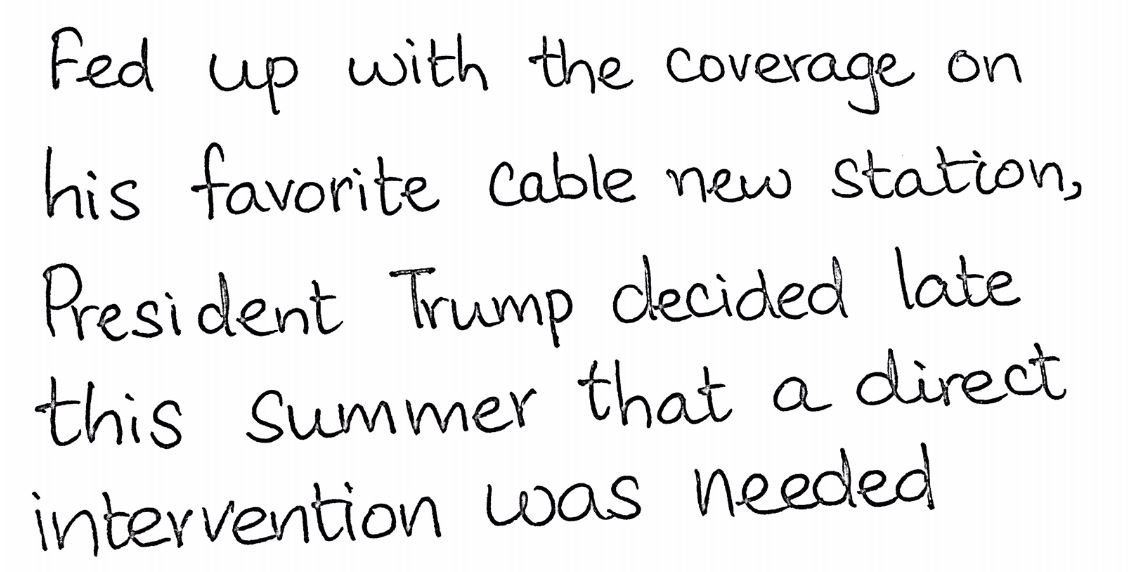

In [276]:
from IPython.display import Image
Image(filename = "C:\\Users\\anant\\Documents\\NLP\\hw4\\news_item.jpg", width=500, height=500)

## Manual POS tag for the news item

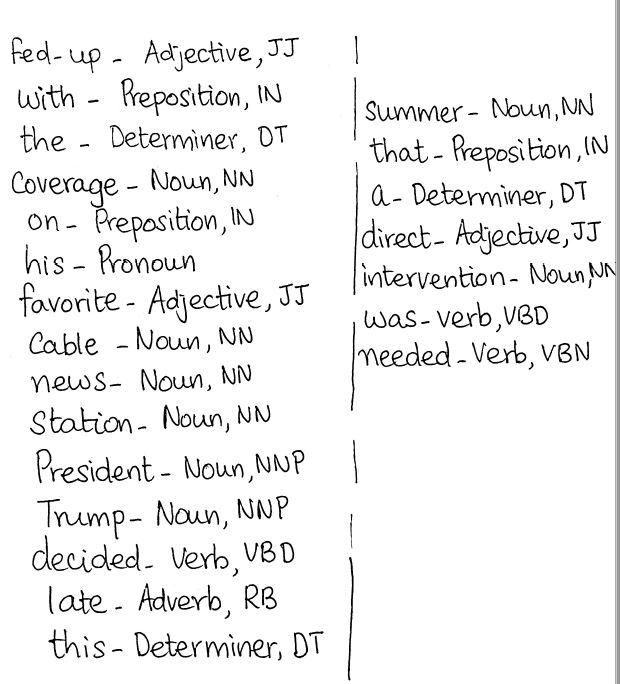

In [277]:
Image(filename = "C:\\Users\\anant\\Documents\\NLP\\hw4\\news_pos.jpg", width=500, height=500)

In [268]:
for word, tag in tagger.tag(test_sent3):
...     print(word, '->', tag)

Fed-up -> None
with -> IN
the -> DT
coverage -> NN
on -> IN
his -> PRP$
favorite -> JJ
cable -> NN
news -> NN
station -> NN
, -> ,
President -> NNP
Trump -> NNP
decided -> VBD
late -> JJ
this -> DT
summer -> NN
that -> IN
a -> DT
direct -> JJ
intervention -> NN
was -> VBD
needed -> VBN


### With Unigram Tagger we are almost there. Just the words "Fed-up" & "late" were tagged incorrectly. Let us try to use the pipeline tagger as I would call and observe the result

In [279]:
for word, tag in tagger2.tag(test_sent3):
...     print(word, '->', tag)

Fed-up -> NN
with -> IN
the -> DT
coverage -> NN
on -> IN
his -> PRP$
favorite -> JJ
cable -> NN
news -> NN
station -> NN
, -> ,
President -> NNP
Trump -> NNP
decided -> VBD
late -> RB
this -> DT
summer -> NN
that -> IN
a -> DT
direct -> JJ
intervention -> NN
was -> VBD
needed -> VBN


## Well in the case of the pipeline tagger, we have got the word "late" correctly tagged. However Fed-up is still tagged NN instead of adjective.

### Conclusion: In the case of manual tagging, I referred to thesaurus and Penn Treebank P.O.S to arrive at the taggers. So I could take them correctly. However in the case of NLTK Python taggers, as they are trained on one set of corpus, the tagging is not 100% accurate. However the results are not too bad .Unigram getting around 91% correct and the combination of Unigram, Bigram and Trigram Taggers around 95%.